In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

In [2]:
ft = np.load(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\features_extraction\trial_12\features.npz')['arr_0']
ft.shape, ft[0]

((417840, 10),
 array([-0.06090377,  0.09185255, -1.0835497 ,  0.13817254, -0.7348305 ,
         0.29094416,  0.2682994 ,  0.3133758 ,  0.2505676 ,  0.08495618],
       dtype=float32))

In [3]:
ft.min(), ft.max(), ft.std(), ft.var()

(np.float32(-2.5654716),
 np.float32(2.0995321),
 np.float32(0.53848153),
 np.float32(0.28996235))

In [4]:
# 5. Load Data
def load_data(file_path, dataset):
    with h5py.File(file_path, 'r') as f:
        X = f[dataset][:]
    return X

In [5]:
def process_data(X):
    X_trans = X.transpose(0,2,1)

    X_reshaped = X_trans.reshape(-1, 120, 150, 6)

    X_10_min = X_reshaped.transpose(0,3,1,2)

    X_10_min = X_10_min.reshape(3482, 6, -1)
    print(X_10_min.shape)

    return X_10_min

In [6]:
def order_data(X, order):
    # Reshape for fitting: (samples * features, timesteps) → (20*6, 150)
    # X_reshaped = X.reshape(-1, X.shape[2])  

    # Fit scaler on entire dataset
    # scaler = StandardScaler()
    # X_standardized = scaler.fit_transform(X_reshaped)

    # Reshape back to (20, 6, 150)
    # X_standardized = X_standardized.reshape(X.shape[0], X.shape[1], X.shape[2])

    # Reorder using NumPy indexing
    X_reorderd = X[:, order, :]

    # Print shape to confirm it remains unchanged
    print("Original shape:", X.shape)
    print("Standardized and reordered shape:", X_reorderd.shape)
    return X_reorderd

In [7]:
X_real = load_data(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\P13_5_sec_30hz_sequences_sensor_data_std_normalized.h5', 'data')
X_syn = load_data(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\features_extraction\trial_12\reconstructed_data.h5', 'reconstructed_data')
X_real.shape, X_syn.shape

((417840, 6, 150), (417840, 6, 150))

In [8]:
X_syn = process_data(X_syn)
X_real = process_data(X_real)
order = [1, 2, 3, 4, 5, 0]  # Acc_X, Acc_y, Acc_z, BvP, EDA, TEMP
data = order_data(X_real, order)

(3482, 6, 18000)
(3482, 6, 18000)
Original shape: (3482, 6, 18000)
Standardized and reordered shape: (3482, 6, 18000)


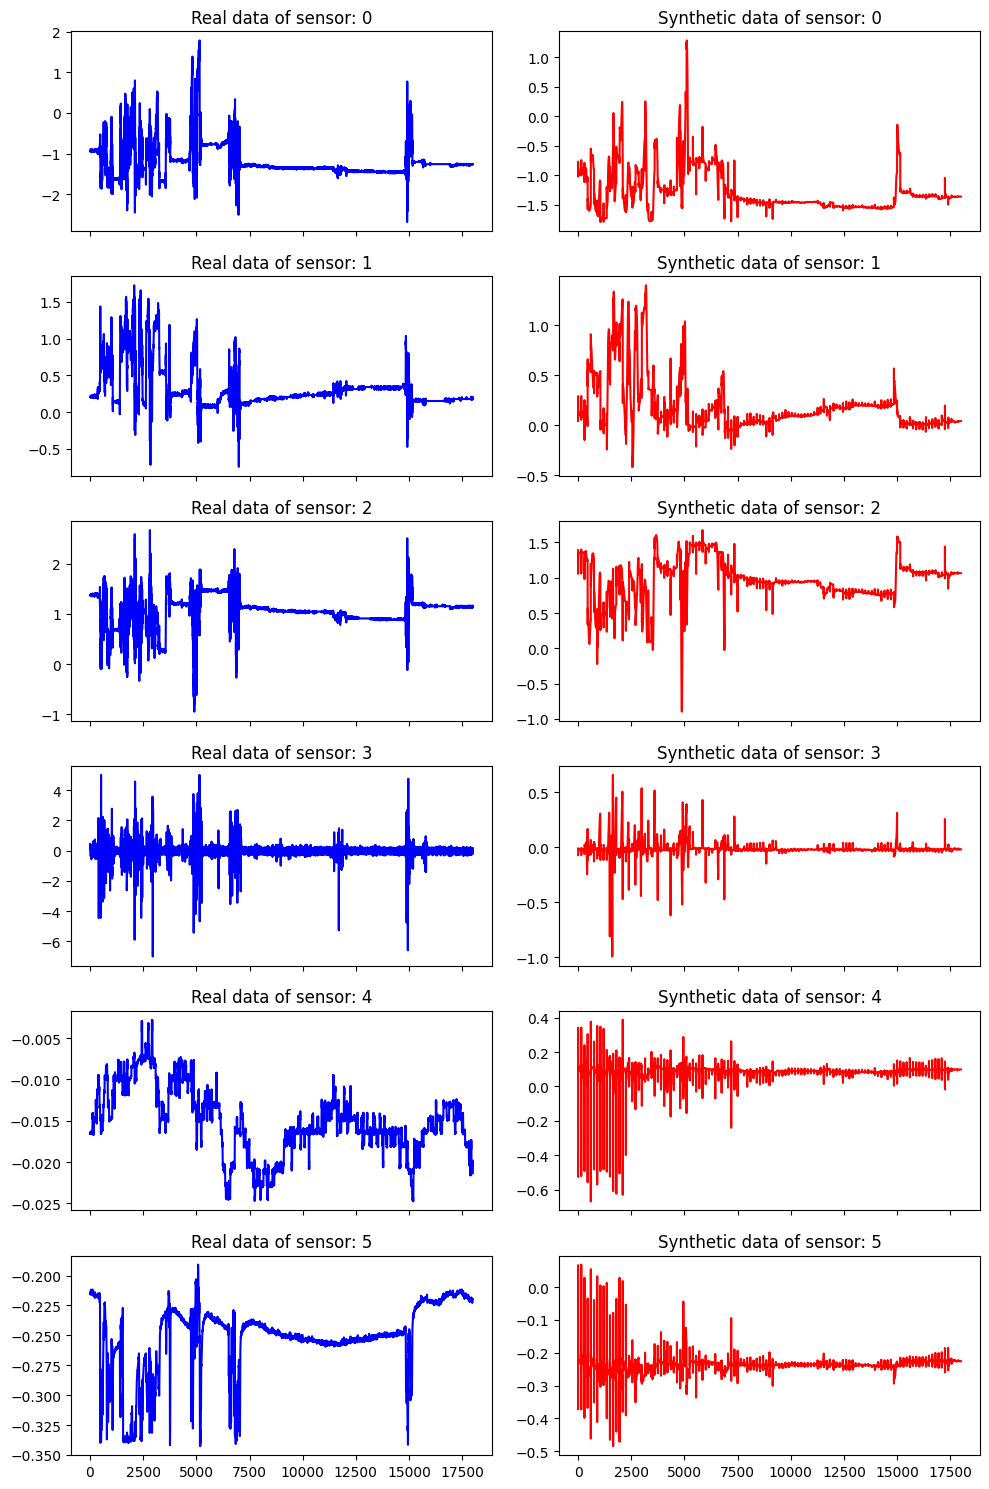

In [10]:
# Create a figure with 6 rows and 2 columns
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot in each subplot
for i in range(6):
    axes[i * 2].plot(data[0, i, :], color='b', label=f'sensor{i}')  # Left column
    axes[i * 2].set_title(f'Real data of sensor: {i}')
    
    axes[i * 2 + 1].plot(X_syn[0, i, :], color='r', label=f'sensor{i}')  # Right column
    axes[i * 2 + 1].set_title(f'Synthetic data of sensor: {i}')

# Hide x-axis labels for all subplots except the last row
for ax in axes[:-2]:  # last row: axes[-2] and axes[-1]
    ax.set_xticklabels([])
    ax.set_xlabel('')  # optional: remove xlabel if any

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# def plot(X, title):
#     for i in range(6):
#         plt.figure(figsize=(16, 6))
#         plt.plot(X[0, i, :], label=i)
#         # Adding labels and title
#         plt.xlabel('Timestep')
#         plt.ylabel('Data')
#         plt.title(f"{title} of sensor: {i}")

#         # Show legend
#         plt.legend()

#         # Display the plot
#         plt.show()

In [11]:
# # Create a figure with 6 rows and 2 columns
# fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15))

# # Flatten axes array for easy iteration
# axes = axes.flatten()

# # Plot in each subplot
# for i in range(6):
#     axes[i * 2].plot(data[0, i, :], color='b', label=f'sensor{i}')  # Left column
#     axes[i * 2].set_title(f'Real data of sensor: {i}')
    
#     axes[i * 2 + 1].plot(X_syn[0, i, :], color='r', label=f'sensor{i}')  # Right column
#     axes[i * 2 + 1].set_title(f'Synthetic data of sensor: {i}')

# # Adjust layout
# plt.tight_layout()

# # Show the figure
# plt.show()